# Changelog - 2nd Attempt

## 25/02/2025
- Add data processing, convert raw data to csv.
- Process data with CountVectoriser
- Create MultinomialNB classifier.
- Overfit on non-spam classification.
- Noticed a lack of spam data vs non-spam data. Trying to even out spam vs non spam for training.
- Better results. Non-spam has F-1 score reduced from 0.99 to 0.94

In [10]:
"""
Open the SMSSpamCollection file and create a new file with the data in csv format.
If the line starts with 'ham' and then a tab, it is not spam, so the first column is 0.
If the line starts with 'spam' and then a tab, it is spam, so the first column is 1.
The second column is the text of the message.
"""

with open('data/SMSSpamCollection', 'r') as raw_data:
    lines = raw_data.readlines()

    open('data/data.csv', 'w').close()

    with open('data/data.csv', 'a') as data: 
        data.write('spam,text\n')
        for line in lines:
            if line.startswith('ham\t'):
                data.write('0,' + line[4:].replace('\n', '').replace(",", "") + '\n')
            elif line.startswith('spam\t'):
                data.write('1,' + line[5:].replace('\n', '').replace(",", "") + '\n')
            else:
                print('Error: ' + line)
                break
    
    with open('data/spammy.txt', 'w') as spammy:
        for line in lines:
            if line.startswith('spam\t'):
                spammy.write(line[5:].replace('\n', '') + '\n')

Explore data...

In [11]:
import pandas as pd

# Load the data
df = pd.read_csv('data/data.csv')

# Basic exploration
print(f"Total messages: {len(df)}")
print(f"Ham messages: {len(df[df['spam'] == 0])}")
print(f"Spam messages: {len(df[df['spam'] == 1])}")
print(f"Percentage spam: {len(df[df['spam'] == 1])/len(df)*100:.2f}%")

# View some examples
print("\nHam examples:")
print(df[df['spam'] == 0]['text'].head(3))
print("\nSpam examples:")
print(df[df['spam'] == 1]['text'].head(3))

Total messages: 5572
Ham messages: 4825
Spam messages: 747
Percentage spam: 13.41%

Ham examples:
0    Go until jurong point crazy.. Available only i...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
Name: text, dtype: object

Spam examples:
2    Free entry in 2 a wkly comp to win FA Cup fina...
5    FreeMsg Hey there darling it's been 3 week's n...
8    WINNER!! As a valued network customer you have...
Name: text, dtype: object


In [12]:
import numpy as np

# Get indices of spam and ham messages
spam_indices = df[df['spam'] == 1].index
ham_indices = df[df['spam'] == 0].index

# Randomly sample ham indices to match number of spam messages
np.random.seed(46382)  # for reproducibility
ham_indices_balanced = np.random.choice(ham_indices, len(spam_indices), replace=False)

# Combine spam and balanced ham indices
balanced_indices = np.concatenate([spam_indices, ham_indices_balanced])

# Create balanced dataset
df_balanced = df.loc[balanced_indices]

# Create new train-test split with balanced data
X = df_balanced['text']
y = df_balanced['spam']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectoriser = CountVectorizer(stop_words='english', lowercase=True)
clf = MultinomialNB()

# X = df['text']
# y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46382)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

X_train = vectoriser.fit_transform(X_train)
X_test = vectoriser.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f"Accuracy: {clf.score(X_test, y_test)*100:.2f}%")



Training set size: 1195
Test set size: 299
Accuracy: 94.31%



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       154
           1       0.93      0.96      0.94       145

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



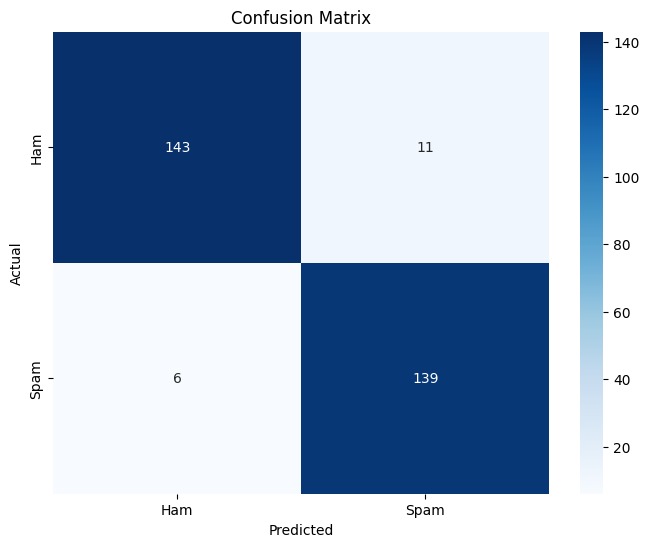

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = clf.predict(X_test)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Add new messages to the dataset

with open('data/extraspam.csv', 'r') as f:
    lines = f.readlines()

    open('data/cleaned_extraspam.csv', 'w').close()

    with open('data/cleaned_extraspam.csv', 'a') as cleaned_f:
        cleaned_f.write('text\n')
        for line in lines:
            line = line[line.find(',') + 1:]
            cleaned_f.write(line.replace('\n', '').replace(',', '') + '\n')

cleaned_df = pd.read_csv('data/cleaned_extraspam.csv')
cleaned_df.head()

,text
0,Hi I'm Alice looking for some men tonight. Rep...
1,Free entry in our weekly prize draw! Text WIN ...
2,FreeMsg: You've been chosen to receive a new i...
3,WIN £500 cash! Simply reply with the word MONE...
4,Urgent! Your Amazon account has been compromis...
